In [ ]:
%matplotlib inline
import matplotlib as plt
import matplotlib.image as mpimg

import numpy as np

In [8]:
class DLA():

    def __init__(self, size):
        self.size = size
        self.state = np.zeros((size, size), dtype = int)
        self.state[size / 2, size / 2] = 1
        
    def printState(self):
        plt.pyplot.imshow(1 - self.state, cmap='gray')

    def getSeed(self):
        '''
            Returns a randomly sampled initial position
            for a particle. 
            Returns (x, y) tuple
        '''
        
        p = int(np.random.rand() / 0.25)    # select edge
        
        possible = [(0, np.random.randint(self.size - 1)),               # Each edge has size - 1 points
                    (np.random.randint(self.size - 1), self.size - 1),   # Corners shouldn't get double prob
                    (self.size - 1, np.random.randint(1, self.size)), 
                    (np.random.randint(1, self.size), 0)]
        
        return possible[p]
    
    def getAdjacentPoints(self, curr):
        '''
            Returns points adjacent to curr within image bounds
            Assumption : Adjacent includes diagonal neighbors (max 8)
                            A|A|A
                            A|X|A
                            A|A|A
                 
            Input args:
                curr : (x, y) tuple
            Returns:
                List of adjacent points
        '''
        
        x, y = curr
        adjacentPoints = [(x - 1, y - 1), (x - 1, y), (x - 1, y + 1),
                          (x, y - 1),                 (x, y + 1),
                          (x + 1, y - 1), (x + 1, y), (x + 1, y + 1)]
        
        # Remove points outside the image
        adjacentPoints = filter(lambda x : x[0] > -1 and x[0] < self.size and \
                                           x[1] > -1 and x[1] < self.size, adjacentPoints)
        return adjacentPoints
    
    def checkIfTerminate(self, curr):
        '''
            Check if curr sticks in image.
            Will happen if any adjacent block is 1
     
            Input args:
                curr : (x, y) tuple
            Returns True/False
        '''
        adjacentPoints = self.getAdjacentPoints(curr)
        return any(map(lambda x : self.state[x] == 1, adjacentPoints))
    
    def getNextPosition(self, curr):
        
        '''
            Get next point. Brownian motion is order 1 markov process
            
            Input args:
                curr : (x, y) tuple
            Returns:
                (x, y) coordinate of next position
        '''

        adjacentPoints = self.getAdjacentPoints(curr) # List of adjacent points
        s = np.random.randint(len(adjacentPoints))    # Get random point
        return adjacentPoints[s]

        
    def addPoint(self, numPoints = 1):

        count = 0
        while count < numPoints:
            
            if (count + 1) % 10 == 0:
                print 'added', count + 1
            
            curr = self.getSeed() # Get initial position
            while not self.checkIfTerminate(curr):
                curr = self.getNextPosition(curr)
            self.state[curr] = 1

            count += 1
        

In [9]:
dla = DLA(100)

In [10]:
dla.addPoint(500)

added 10
added 20
added 30
added 40
added 50
added 60
added 70
added 80
added 90
added 100
added 110
added 120
added 130
added 140
added 150
added 160
added 170
added 180
added 190
added 200
added 210
added 220
added 230
added 240
added 250
added 260
added 270
added 280
added 290
added 300
added 310
added 320
added 330
added 340
added 350
added 360
added 370
added 380
added 390
added 400
added 410
added 420
added 430
added 440
added 450
added 460
added 470
added 480
added 490
added 500


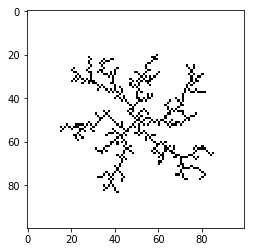

In [11]:
dla.printState()